IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from google.colab import drive

CREATE PCA CLASS

In [ ]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components #Number of principal components to compute
        self.components = None #Principal components
        self.mean = None #Column average of observations' matrix
        self.max = None #Total max of observations' matrix

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.max = np.max(X)
        X = X - self.mean #Mean centering of each feature
        X = X / self.max #Normalization of each feature

        X = X.T #Transpose of observations' matrix

        U, S, Vh = np.linalg.svd(X) #Singular Value Decomposition
        self.components = U[:,:self.n_components] #Selection of the number of principal components of interest
        self.variance = S #Variance of explained by each principal component

    def transform(self, X):
        # projects data
        X = X - self.mean #Mean centering of each feature
        X = X / self.max #Normalization of each feature

        X = X.T #Transpose of observations' matrix

        return np.dot(self.components.T, X), self.variance

MOUNT DRIVE

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


LOAD DATA

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Porosity characterization/'
filename = 'POROSITY'


data = np.loadtxt('{}{}_data.txt'.format(path, filename))
X = data
info = np.loadtxt('{}{}_info.txt'.format(path, filename))
y = info

RUN PCA

In [ ]:
# Testing
if __name__ == "__main__":

    # Project the data onto the 2 primary principal components
    pca = PCA(2)
    pca.fit(X)
    X_projected, S = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

Shape of X: (1002, 3500)
Shape of transformed X: (2, 1002)


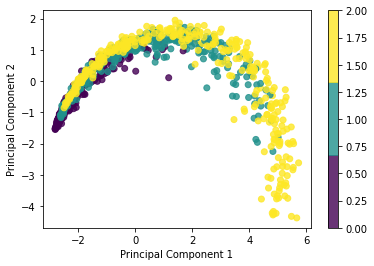

In [ ]:
#Plot the projected data
x1 = X_projected[0, :]
x2 = X_projected[1, :]

plt.scatter(
    x1, x2, c=y,  alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.savefig('2Pulse-echo.jpg', bbox = 'tight', dpi =400)
plt.show()

COMPUTE PERCENTAGE OF VARIANCE EXPLAINED BY EACH PRINCIPAL COMPONENT

In [ ]:
#Variance explained by different P.C.
print('First P.C. explains %f' %(S[0]**2*100/np.sum(S**2))+'% of the total variance.')
print('Second P.C. explains %f' %(S[1]**2*100/np.sum(S**2))+'% of the total variance.')

First P.C. explains 72.590936% of the total variance.
Second P.C. explains 14.819459% of the total variance.
